In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [8]:
# Read The Dataset
data = pd.read_csv('data/google_stock.csv', index_col='Date', parse_dates=['Date']).copy()
data.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-04-20  1271.000000  1281.599976  1261.369995  1266.609985  1266.609985   
2020-04-21  1247.000000  1254.270020  1209.709961  1216.339966  1216.339966   
2020-04-22  1245.540039  1285.613037  1242.000000  1263.209961  1263.209961   
2020-04-23  1271.550049  1293.310059  1265.670044  1276.310059  1276.310059   
2020-04-24  1261.170044  1280.400024  1249.449951  1279.310059  1279.310059   

             Volume  
Date                 
2020-04-20  1695500  
2020-04-21  2153000  
2020-04-22  2093100  
2020-04-23  1566200  
2020-04-24  1639600

In [9]:
# Check For NAN Values OR Missing Values
data.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

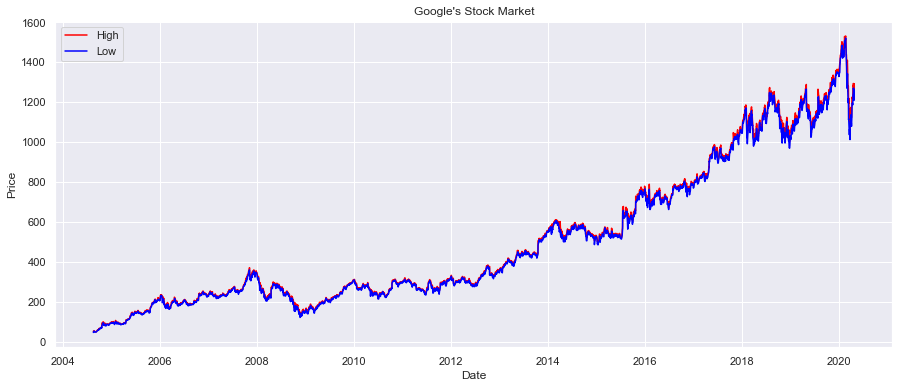

In [10]:
# Visualizing The Data
sns.set(style='darkgrid')
plt.figure(figsize=(15, 6))
plt.title("Google's Stock Market")
plt.xlabel('Date')
plt.ylabel('Price')

# plt.plot(data['Open'], label='Open', color='red')
plt.plot(data['High'], label='High', color='red')
plt.plot(data['Low'], label='Low', color='blue')
# plt.plot(data['Close'], label='Close', color='blue')

plt.legend()
plt.show()

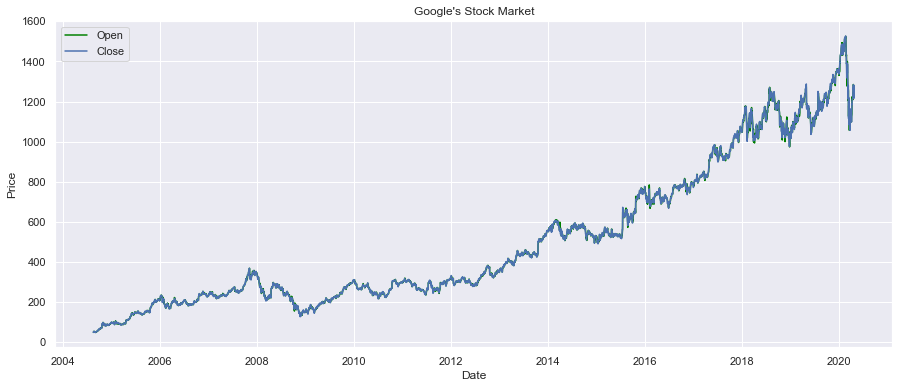

In [11]:
# Visualizing The Data
sns.set(style='darkgrid')
plt.figure(figsize=(15, 6))
plt.title("Google's Stock Market")
plt.xlabel('Date')
plt.ylabel('Price')

plt.plot(data['Open'], label='Open', color='green')
plt.plot(data['Close'], label='Close')

plt.legend()
plt.show()

In [22]:
# Splitting The Data Into Training & Testing
training_data = data.loc[data.index < '2019-01-01', ['Open', 'High', 'Low', 'Close', 'Volume']]
testing_data = data.loc[data.index >= '2019-01-01', ['Open', 'High', 'Low', 'Close', 'Volume']]

# training_data.shape
training_data_ = training_data[: training_data.shape[0]-60].copy()
training_data_

Open         High          Low        Close    Volume
Date                                                                    
2004-08-19    49.813286    51.835709    47.800831    49.982655  44871300
2004-08-20    50.316402    54.336334    50.062355    53.952770  22942800
2004-08-23    55.168217    56.528118    54.321388    54.495735  18342800
2004-08-24    55.412300    55.591629    51.591621    52.239193  15319700
2004-08-25    52.284027    53.798351    51.746044    52.802086   9232100
...                 ...          ...          ...          ...       ...
2018-09-27  1186.729980  1202.099976  1183.630005  1194.640015   1260800
2018-09-28  1191.869995  1195.410034  1184.500000  1193.469971   1380600
2018-10-01  1199.890015  1209.900024  1190.300049  1195.310059   1357600
2018-10-02  1190.959961  1209.959961  1186.630005  1200.109985   1687900
2018-10-03  1205.000000  1206.410034  1193.829956  1202.949951   1256200

[3557 rows x 5 columns]

In [28]:
# Normalizing The Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training_data = scaler.fit_transform(training_data_)

scaled_training_data

array([[3.30294890e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577404e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22150736e-01],
       ...,
       [9.41789002e-01, 9.47686830e-01, 9.51116356e-01, 9.40074521e-01,
        1.63533397e-02],
       [9.34478814e-01, 9.47735830e-01, 9.48061090e-01, 9.44013692e-01,
        2.03553462e-02],
       [9.45972062e-01, 9.44833690e-01, 9.54054960e-01, 9.46344376e-01,
        1.51247492e-02]])

In [29]:
# Splitting The Data Into X_train, y_train
X_train = []
y_train = []

for i in range(60, scaled_training_data.shape[0]):
    X_train.append(scaled_training_data[i-60:i])
    y_train.append(scaled_training_data[i, 0])

In [30]:
# Converting List Into Numpy Array
X_train, y_train = np.array(X_train), np.array(y_train)

X_train.shape, y_train.shape

((3497, 60, 5), (3497,))

## Building The Model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [33]:
# Initializing The RNN
model = Sequential()

# Adding rst LSTM Layer & Dropout
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))

# Adding The Second LSTM Layer & Dropout
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding The Third LSTM Layer & Dropout
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding The Fourth LSTM Layer & Dropout
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding The Fifth LSTM Layer & Dropout
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding The Final Dense Layer & Dropout
model.add(Dense(units = 1))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [34]:
# Compiting The Model
model.compile(optimizer='adam', loss='mean_squared_error')

In [35]:
# Train The Model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
3497/3497 [==============================] - 32s 9ms/sample - loss: 0.0079
Epoch 2/10
3497/3497 [==============================] - 29s 8ms/sample - loss: 0.0025
Epoch 3/10
3497/3497 [==============================] - 29s 8ms/sample - loss: 0.0019
Epoch 4/10
3497/3497 [==============================] - 28s 8ms/sample - loss: 0.0016
Epoch 5/10
3497/3497 [==============================] - 28s 8ms/sample - loss: 0.0016
Epoch 6/10
3497/3497 [==============================] - 28s 8ms/sample - loss: 0.0016
Epoch 7/10
3497/3497 [==============================] - 29s 8ms/sample - loss: 0.0017
Epoch 8/10
3497/3497 [==============================] - 28s 8ms/sample - loss: 0.0015
Epoch 9/10
3497/3497 [==============================] - 29s 8ms/sample - loss: 0.0016
Epoch 10/10
3497/3497 [==============================] - 29s 8ms/sample - loss: 0.0011


## Preprocessing The Test Data

In [36]:
# Get The Last 60 Days Data From The Training Data
past_60_days_data = training_data.tail(60)
past_60_days_data

Open         High          Low        Close   Volume
Date                                                                   
2018-10-04  1195.329956  1197.510010  1155.576050  1168.189941  2209500
2018-10-05  1167.500000  1173.500000  1145.119995  1157.349976  1184300
2018-10-08  1150.109985  1168.000000  1127.364014  1148.969971  1932400
2018-10-09  1146.150024  1154.349976  1137.572021  1138.819946  1308700
2018-10-10  1131.079956  1132.170044  1081.130005  1081.219971  2675700
2018-10-11  1072.939941  1106.400024  1068.270020  1079.319946  2949000
2018-10-12  1108.000000  1115.000000  1086.401978  1110.079956  2101300
2018-10-15  1108.910034  1113.446045  1089.000000  1092.250000  1372400
2018-10-16  1104.589966  1124.219971  1102.500000  1121.280029  1928500
2018-10-17  1126.459961  1128.989990  1102.189941  1115.689941  1467200
2018-10-18  1121.839966  1121.839966  1077.089966  1087.969971  2094500
2018-10-19  1093.369995  1110.359985  1087.750000  1096.459961  1267600
2018-10-22  1103.060059  1112.229980  1091.000000  1101.160034  1514200
2018-10-23  1080.890015  1107.890015  1070.000000  1103.689941  1848700
2018-10-24  1104.250000  1106.119995  1048.739990  1050.709961  1982400
2018-10-25  1071.790039  1110.979980  1069.550049  1095.569946  2545800
2018-10-26  1037.030029  1106.530029  1034.089966  1071.469971  4187600
2018-10-29  1082.469971  1097.040039   995.830017  1020.080017  3880700
2018-10-30  1008.460022  1037.489990  1000.750000  1036.209961  3212700
2018-10-31  1059.810059  1091.939941  1057.000000  1076.770020  2529800
2018-11-01  1075.800049  1083.974976  1062.459961  1070.000000  1482000
2018-11-02  1073.729980  1082.974976  1054.609985  1057.790039  1839000
2018-11-05  1055.000000  1058.469971  1021.239990  1040.089966  2441400
2018-11-06  1039.479980  1064.344971  1038.069946  1055.810059  1233300
2018-11-07  1069.000000  1095.459961  1065.900024  1093.390015  2058400
2018-11-08  1091.380005  1093.270020  1072.204956  1082.400024  1488200
2018-11-09  1073.989990  1075.560059  1053.109985  1066.150024  1343200
2018-11-12  1061.390015  1062.119995  1031.000000  1038.630005  1471800
2018-11-13  1043.290039  1056.604980  1031.150024  1036.050049  1513700
2018-11-14  1050.000000  1054.563965  1031.000000  1043.660034  1565900
2018-11-15  1044.709961  1071.849976  1031.780029  1064.709961  1836100
2018-11-16  1059.410034  1067.000000  1048.979980  1061.489990  1658100
2018-11-19  1057.199951  1060.790039  1016.260010  1020.000000  1858600
2018-11-20  1000.000000  1031.739990   996.020020  1025.760010  2449100
2018-11-21  1036.760010  1048.560059  1033.469971  1037.609985  1534300
2018-11-23  1030.000000  1037.589966  1022.398987  1023.880005   691500
2018-11-26  1038.349976  1049.310059  1033.910034  1048.619995  1942800
2018-11-27  1041.000000  1057.579956  1038.489990  1044.410034  1803200
2018-11-28  1048.760010  1086.839966  1035.760010  1086.229980  2475400
2018-11-29  1076.079956  1094.244995  1076.000000  1088.300049  1468900
2018-11-30  1089.069946  1095.569946  1077.880005  1094.430054  2580200
2018-12-03  1123.140015  1124.650024  1103.665039  1106.430054  1991200
2018-12-04  1103.119995  1104.420044  1049.979980  1050.819946  2345200
2018-12-06  1034.260010  1071.199951  1030.770020  1068.729980  2769200
2018-12-07  1060.010010  1075.260010  1028.500000  1036.579956  2101200
2018-12-10  1035.050049  1048.449951  1023.289978  1039.550049  1807700
2018-12-11  1056.489990  1060.599976  1039.839966  1051.750000  1394700
2018-12-12  1068.000000  1081.650024  1062.790039  1063.680054  1523800
2018-12-13  1068.069946  1079.760010  1053.930054  1061.900024  1329800
2018-12-14  1049.979980  1062.599976  1040.790039  1042.099976  1686600
2018-12-17  1037.510010  1053.150024  1007.900024  1016.530029  2385400
2018-12-18  1026.089966  1049.479980  1021.440002  1028.709961  2192500
2018-12-19  1033.989990  1062.000000  1008.049988  1023.010010  2479300
2018-12-20  1018.130005  1034.219971   996.359985  1009.409

In [37]:
# Creating The New Test Data
new_testing_data = past_60_days_data.append(testing_data)
new_testing_data

Open         High          Low        Close   Volume
Date                                                                   
2018-10-04  1195.329956  1197.510010  1155.576050  1168.189941  2209500
2018-10-05  1167.500000  1173.500000  1145.119995  1157.349976  1184300
2018-10-08  1150.109985  1168.000000  1127.364014  1148.969971  1932400
2018-10-09  1146.150024  1154.349976  1137.572021  1138.819946  1308700
2018-10-10  1131.079956  1132.170044  1081.130005  1081.219971  2675700
...                 ...          ...          ...          ...      ...
2020-04-20  1271.000000  1281.599976  1261.369995  1266.609985  1695500
2020-04-21  1247.000000  1254.270020  1209.709961  1216.339966  2153000
2020-04-22  1245.540039  1285.613037  1242.000000  1263.209961  2093100
2020-04-23  1271.550049  1293.310059  1265.670044  1276.310059  1566200
2020-04-24  1261.170044  1280.400024  1249.449951  1279.310059  1639600

[391 rows x 5 columns]

In [38]:
# Normalizing The Test Data
scaled_testing_data = scaler.transform(new_testing_data)
scaled_testing_data

array([[0.93805611, 0.93755773, 0.92220906, 0.91781776, 0.0266752 ],
       [0.91527437, 0.91792904, 0.91350452, 0.90892169, 0.01425359],
       [0.90103881, 0.91343268, 0.89872289, 0.90204445, 0.02331778],
       ...,
       [0.97915835, 1.00958382, 0.99415592, 0.99579816, 0.02526486],
       [1.00045027, 1.0158763 , 1.01386094, 1.00654906, 0.0188808 ],
       [0.99195315, 1.00532207, 1.00035791, 1.00901108, 0.01977013]])

In [39]:
# Splitting The Testing Data Into X_test, y_test
X_test = []
y_test = []

for i in range(60, scaled_testing_data.shape[0]):
    X_test.append(scaled_testing_data[i-60:i])
    y_test.append(scaled_testing_data[i, 0])

In [40]:
# Converting Lists Into Numpy Array
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((331, 60, 5), (331,))

In [41]:
# Evaluate The Model
loss = model.evaluate(X_test, y_test)

331/331 [==============================] - 1s 3ms/sample - loss: 0.0035


## Make Prediction

In [49]:
# Predicting the open prices
predicted = model.predict(X_test)
# predicted

In [52]:
scaler.scale_

array([8.18605127e-04, 8.17521128e-04, 8.32487534e-04, 8.20673293e-04,
       1.21162775e-08])

In [53]:
# Rescaling The Data
scale = 1/8.18605127e-04
predicted = predicted * scale
y_test = y_test * scale

In [54]:
# Creating The New DataFrame With Predicted VS Actual Data
predicted_vs_actual = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": predicted.flatten()})
predicted_vs_actual

Actual    Predicted
0     967.160206  1008.269897
1     991.590199  1005.642578
2     983.180165  1003.219971
3    1022.090199  1001.113953
4    1026.700184   999.430481
..           ...          ...
326  1221.590199  1105.994507
327  1197.590199  1110.188354
328  1196.130238  1115.239380
329  1222.140248  1120.882202
330  1211.760243  1126.882812

[331 rows x 2 columns]

## Visualizing The Predicted Data

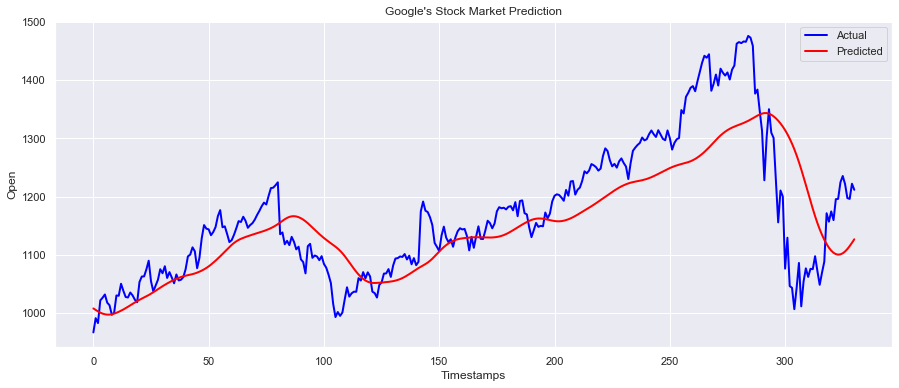

In [55]:
# Visualizing The Data
sns.set(style='darkgrid')
plt.figure(figsize=(15, 6))
plt.title("Google's Stock Market Prediction")
plt.xlabel('Timestamps')
plt.ylabel('Open')

plt.plot(predicted_vs_actual['Actual'], label='Actual', linewidth=2, color='blue')
plt.plot(predicted_vs_actual['Predicted'], label='Predicted', linewidth=2, color='red')

plt.legend()
plt.savefig('stock_prediction.png', dpi=100)
plt.show()